In [9]:
#CARGAR LIBRERIAS
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Paso 1. Abre el archivo de datos y estudia la información general 

df_games=pd.read_csv('ICE_GAMES_DATA/games.csv')

## Paso 2. Prepara los datos

2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).

2.2 Convierte los datos en los tipos necesarios.

2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

2.4 Si es necesario, elige la manera de tratar los valores ausentes:

Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.    

In [11]:
#REVISARE INFORMACION GENERAL DEL DF

df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [13]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [14]:
df_games.shape

(16715, 11)

In [15]:
#MUESTRA DE DATOS

print('----MUESTRA DE DATOS----')
df_games.head(15)

----MUESTRA DE DATOS----


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Tengo las siguentes observaciones: La columna 'Year_of_realise' se encuentra almacenada como float, se realizará un cambio a Int.

Observo que las columnas 'Critic_Score','User_Score','Rating', tienen demasiados datos nulos, sin embargo para este analisis no voy a dropear estas columnas puesto que el analisis me solicita observar como las reseñas profecionales y las reseñas de usuarios tienen alguna realcion con las ventas por lo que se toman las siguentes desiciones:

### COLUMNA RATING:
    En esta columna al ser categorica me convendría tener los valores ausentes etiquetados como no hay datos, se conoce que existe una clasificacion aparte "TBD", sin embargo al no ser una categoria si no un dato faltante mas, la interpreto como valor faltante y la unificaré con la categoría NaN.
### COLUMNA Critic_Score User_Score
    En este caso pienso que dejar las columnas vacias sería la mejor opción, hay varias razones para ello, la principal es porque considero que no es lo mismo calificar al Wiifit que al GTA V y tenerlo en la misma bolsa, diferentes generos, años, epocas, etc, practicamnete me estoy inventando calificaicones de juegos. Por ello utilizaré NaN y para analisis utilizaré.

Porque los valores estan ausentes:

Opino que en la columna de ''Year_of_Release'' Algunos juegos son muy antiguos o provienen de plataformas menos documentadas, por lo que el año no está registrado en la fuente original, puede haber errores u omisiones en la carga de datos,

En la columna rating Muchos juegos pueden no tener rating ESRB porque:

Son títulos lanzados fuera de EE. UU. (por ejemplo, solo Japón o Europa).

Son juegos indie o digitales que no pasaron por el proceso formal de clasificación.

Los valores TBD indican que la clasificación estaba “por determinarse” al momento de recolectar los datos, es decir, el juego aún no tenía rating confirmado.

También puede haber huecos de información en la fuente: algunos registros simplemente no incluyeron la clasificación aunque el juego sí la tenga.

En critic_score y user_score

No todos los juegos reciben reseñas en sitios especializados:

Juegos muy de nicho, poco populares o de bajo presupuesto.

Lanzamientos regionales que no aparecen en la base de datos de críticas usada para el dataset.

Algunos juegos pueden ser muy nuevos al momento del corte de datos y todavía no tenían suficientes reseñas de críticos o usuarios para calcular un puntaje o viseversa juegos muy antiguos los cuales no se realizaron criticas por medios especializados

Es posible que existan problemas de integración entre fuentes (por ejemplo, el juego aparece en la base de ventas pero no en la base de reseñas).

Como colcusion general diria que en la mayoría de los casos, los datos ausentes parecen reflejar limitaciones reales de la información disponible (falta de rating o reseñas) y no simplemente errores de programación, por eso, en vez de asumir valores arbitrarios, es importante reconocer esos ausentes como una característica del negocio (no todos los juegos son clasificados o reseñados) y tratarlos con cuidado en el análisis.


Finalmente creé la columna total_sales como suma de las ventas en Norteamérica, Europa, Japón y otras regiones (na_sales, eu_sales, jp_sales, other_sales) para tener una métrica única de ventas totales por juego y facilitar las comparaciones.



In [16]:
#RENOMBRAR COLUMNAS A minusculas

df_games.columns=df_games.columns.str.lower()

In [17]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [18]:
df_games['Rating'] = df_games['rating'].replace('TBD', pd.NA)

In [19]:
df_games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN


In [20]:
#CAMBIO DE FECHA DE FLOAT A INT

df_games['year_of_release']=df_games['year_of_release'].astype('Int64')

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  Rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(6)
memory usage: 1.5+ MB


In [21]:
#COLUMNA ARTIFICIAL DE VENTAS TOTALES

df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

df_games.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN,28.31


# Paso 3. Analiza los datos
Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 
Saca conclusiones.

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


In [22]:
#1 CREARO UN DF PARA VER LOS JUEGOS LANZADOS EN DIFERENTES AÑOS

games_per_year=(
    df_games
    .dropna(subset=['year_of_release'])
    .groupby('year_of_release')
    .size()
    .reset_index(name='n_games')
    .sort_values('year_of_release'))

print(games_per_year.head())
print(games_per_year.tail())

   year_of_release  n_games
0             1980        9
1             1981       46
2             1982       36
3             1983       17
4             1984       14
    year_of_release  n_games
32             2012      653
33             2013      544
34             2014      581
35             2015      606
36             2016      502


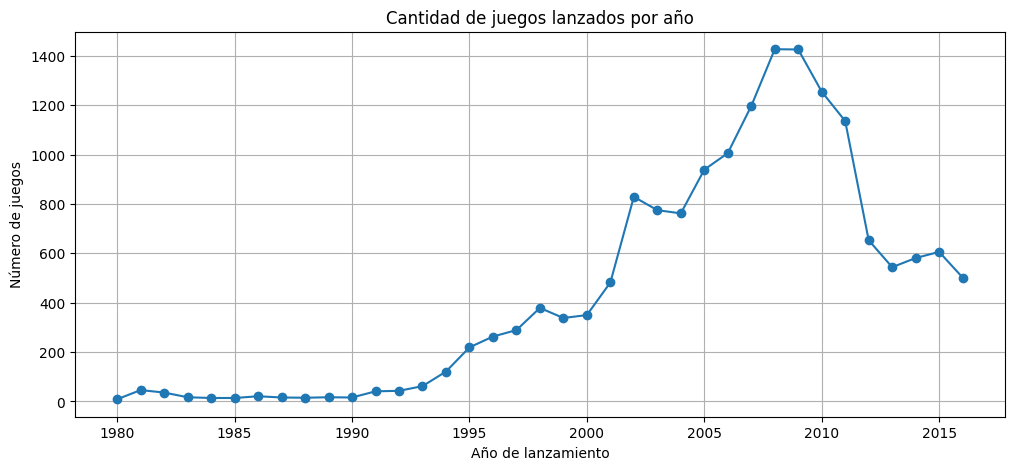

,year_of_release,n_games,pct_total
0,1980,9,0.054725
1,1981,46,0.279703
2,1982,36,0.218898
3,1983,17,0.103369
4,1984,14,0.085127
5,1985,14,0.085127
6,1986,21,0.127691
7,1987,16,0.097288
8,1988,15,0.091208
9,1989,17,0.103369


In [23]:
#Graficare el df
plt.figure(figsize=(12, 5))
plt.plot(games_per_year['year_of_release'], games_per_year['n_games'], marker='o')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.title('Cantidad de juegos lanzados por año')
plt.grid(True)
plt.show()

total_juegos = games_per_year['n_games'].sum()
games_per_year['pct_total'] = games_per_year['n_games'] / total_juegos * 100

games_per_year.head(25)

Gracias a este grafico puedo notar que antes del 2000, el número de juegos por año es mucho menor (décadas iniciales de la industria, datos escasos).

A partir de 2000:

El número de lanzamientos supera claramente a los años anteriores.

Empieza la “era moderna” de consolas (PS2, Xbox, etc.), más comparable con el mercado de 2017.

Concluyo que Los años anteriores a 2000 tienen pocos juegos y representan otra etapa del mercado, por lo que no son tan representativos. Para el análisis principal considero solo juegos a partir del año 2000.

## Plataformas: líderes, crecimiento y declive

In [24]:
df_recent = df_games[df_games['year_of_release'] >= 2000].copy()

platform_sales = (
    df_recent
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

print(platform_sales.head(10))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
Name: total_sales, dtype: float64


In [25]:
top_platforms = platform_sales.head(8).index#xbox one esta hasta el lugar 13 de ventas lo que hace el grafico se tenga que ver demasiado saturado,no sabia que habia vendido tan poco.

platform_sales.head(15)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
Name: total_sales, dtype: float64

In [26]:
top_hist = list(platform_sales.head(8).index)#Me di cuenta en esta parte que para lograr incluir a xbox one en las graficas para el analisis de las generaciones de consolas tengo que forzar la inclusion a xbox one, desepcion para un team xbox.

for extra in ['PS4', 'XOne']:
    if extra in platform_sales.index and extra not in top_hist:
        top_hist.append(extra)

print('Plataformas que voy a graficar:', top_hist)

Plataformas que voy a graficar: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'GBA', 'PSP', 'XOne']


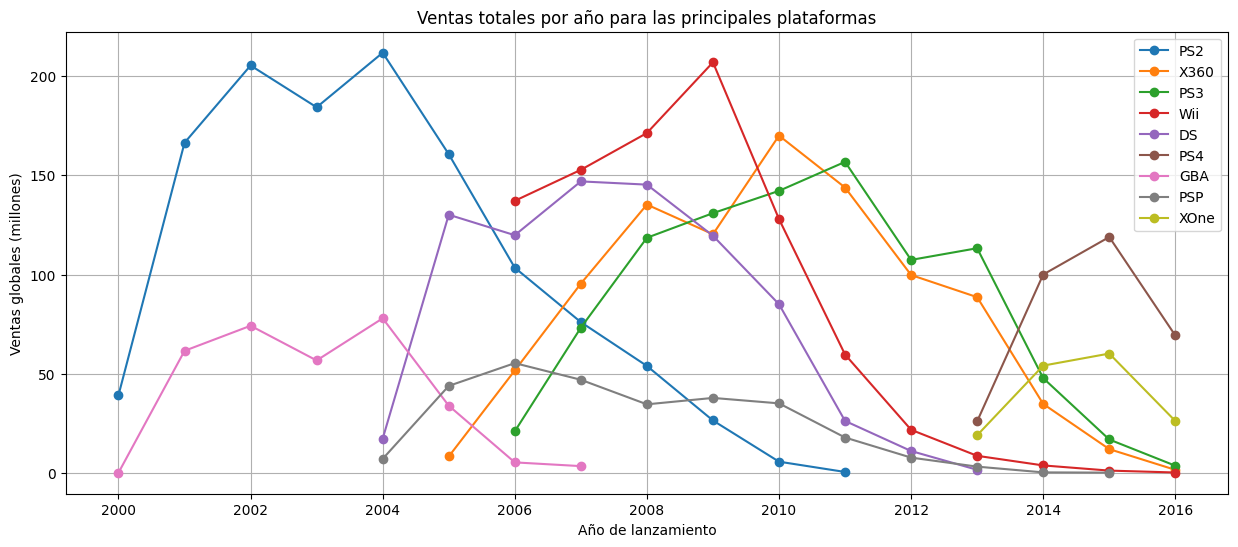

In [27]:
df_top = df_recent[df_recent['platform'].isin(top_hist)]

platform_year_sales = (
    df_top
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

plt.figure(figsize=(15,6))

for plat in top_hist:
    data = platform_year_sales[platform_year_sales['platform'] == plat]
    plt.plot(data['year_of_release'], data['total_sales'], marker='o', label=plat)

plt.title('Ventas totales por año para las principales plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
life_span = (
    df_recent
    .groupby('platform')['year_of_release']
    .agg(first_year='min', last_year='max')
    .reset_index()
)

life_span['duration_years'] = life_span['last_year'] - life_span['first_year']

life_span.sort_values('first_year').head(10)

,platform,first_year,last_year,duration_years
1,DC,2000,2008,8
3,GB,2000,2001,1
6,N64,2000,2002,2
4,GBA,2000,2007,7
7,PC,2000,2016,16
14,WS,2000,2001,1
9,PS2,2000,2011,11
8,PS,2000,2003,3
18,XB,2000,2008,8
5,GC,2001,2007,6


In [29]:
last_year = df_recent['year_of_release'].max()

old_popular = life_span[
    (life_span['platform'].isin(top_platforms)) &
    (life_span['last_year'] < last_year)   # ya no aparecen en el último año
]

old_popular

,platform,first_year,last_year,duration_years
2,DS,2004,2013,9
4,GBA,2000,2007,7
9,PS2,2000,2011,11
12,PSP,2004,2015,11


### Conclucion

En todo el período 2000+ las mayores ventas acumuladas corresponden a PS2, seguida de Wii, X360, PS3 y DS; PS2 y DS son además las más longevas (11 y 9 años).

En el período reciente 2012–2016 las plataformas líderes por ventas son PS3, X360, PS4, 3DS, XOne y WiiU.

Los gráficos por año muestran que PS3 y X360 están claramente en declive: empiezan muy alto y casi desaparecen hacia 2016.

Forcé la inclusión de PS4 y Xbox One, aunque no entren todavía en el top histórico, porque son la generación más reciente y relevantes para construir el modelo de 2017. De esta forma el gráfico combina las consolas clásicas más exitosas con las plataformas actuales, sin saturar la visualización.”

PS4 y XOne muestran la trayectoria propia de una generación nueva: crecen con fuerza entre 2013 y 2015 y solo caen ligeramente en 2016, por lo que las considero las plataformas más prometedoras para 2017. 3DS y WiiU mantienen ventas menores y también decrecientes.

## Distribución de ventas por plataforma

In [30]:
df_model = df_games[(df_games['year_of_release'] >= 2012) &
                    (df_games['year_of_release'] <= 2016)].copy()

df_model.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,M,13.79


In [31]:
platform_sales_12_16 = (
    df_model
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

platform_sales_12_16.head(10)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64

In [32]:
top_platforms_12_16 = platform_sales_12_16.head(6).index
top_platforms_12_16

Index(['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU'], dtype='object', name='platform')

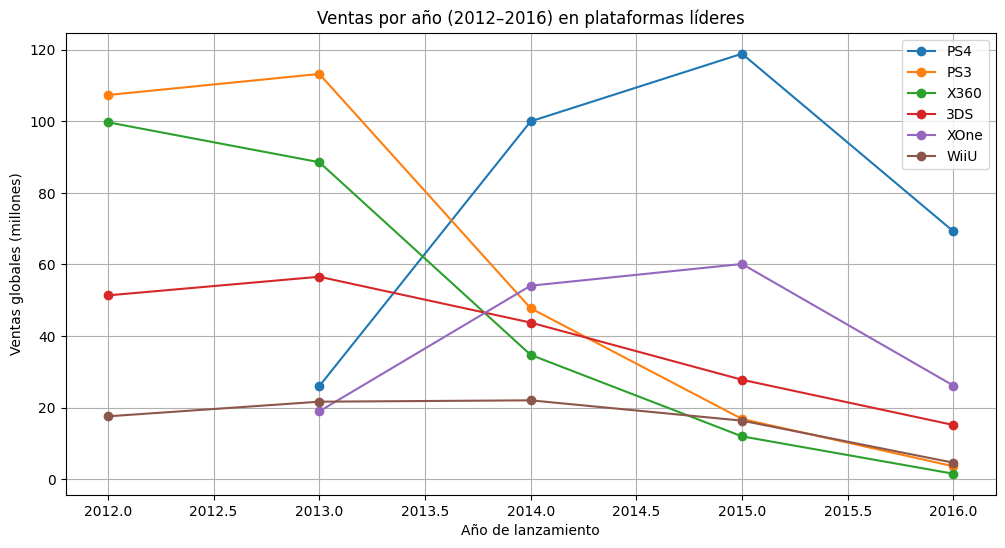

In [33]:
platform_year_sales_12_16 = (
    df_model[df_model['platform'].isin(top_platforms_12_16)]
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for plat in top_platforms_12_16:
    data = platform_year_sales_12_16[platform_year_sales_12_16['platform'] == plat]
    plt.plot(data['year_of_release'], data['total_sales'], marker='o', label=plat)

plt.title('Ventas por año (2012–2016) en plataformas líderes')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.legend()
plt.grid(True)
plt.show()

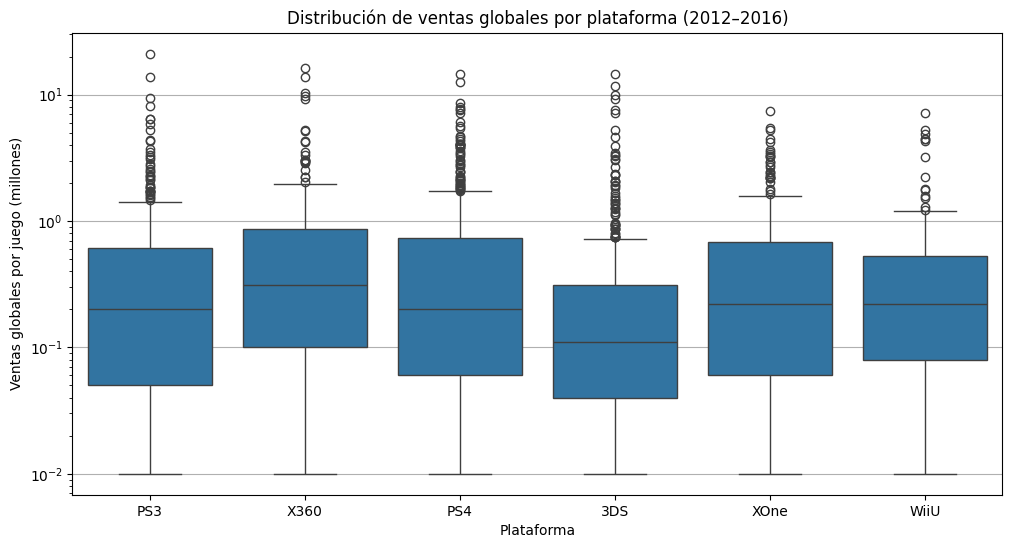

In [34]:
df_box = df_model[df_model['platform'].isin(top_platforms_12_16)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_box, x='platform', y='total_sales')
plt.yscale('log')  # Utilizo log para evitar que los superventas aplasten la caja
plt.title('Distribución de ventas globales por plataforma (2012–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales por juego (millones)')
plt.grid(True, axis='y')
plt.show()

In [35]:
mean_sales = (
    df_box
    .groupby('platform')['total_sales']
    .mean()
    .sort_values(ascending=False)
)

mean_sales

platform
X360    0.810068
PS4     0.801378
XOne    0.645020
PS3     0.585781
WiiU    0.559116
3DS     0.491439
Name: total_sales, dtype: float64

### CONLUCION

El diagrama de caja para PS3, X360, PS4, 3DS, XOne y WiiU muestra el mismo patrón:

Muchos juegos con ventas bajas y unos pocos títulos que son superventas (outliers muy altos).

Las diferencias entre plataformas existen pero no son extremas:

La venta media por juego es ligeramente mayor en X360 y PS4, seguida de XOne, y algo menor en PS3, WiiU y 3DS.

En general, el negocio depende de unos pocos éxitos por plataforma más que de un rendimiento uniforme de todos los títulos.

## RESEÑAS


In [36]:
df_model['user_score'] = pd.to_numeric(df_model['user_score'], errors='coerce')

df_model.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,M,13.79


In [37]:
df_ps4 = df_model[df_model['platform'] == 'PS4'].copy()#Tomaré ps4 para esta comparativa al ser la plataforma reciente con mas datos.

df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,M,7.66


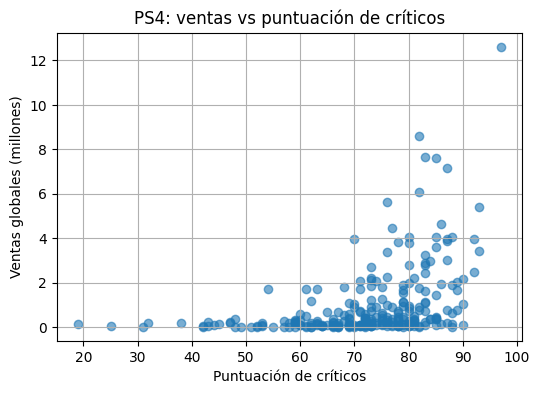

Correlación ventas–critic_score (PS4): 0.4065679020617816


In [38]:
# Quitar filas sin critic_score o sin ventas
df_ps4_critic = df_ps4.dropna(subset=['critic_score', 'total_sales'])

# Dispersión
plt.figure(figsize=(6,4))
plt.scatter(df_ps4_critic['critic_score'], df_ps4_critic['total_sales'], alpha=0.6)
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas globales (millones)')
plt.title('PS4: ventas vs puntuación de críticos')
plt.grid(True)
plt.show()

# Correlación
corr_critic = df_ps4_critic['critic_score'].corr(df_ps4_critic['total_sales'])
print('Correlación ventas–critic_score (PS4):', corr_critic)

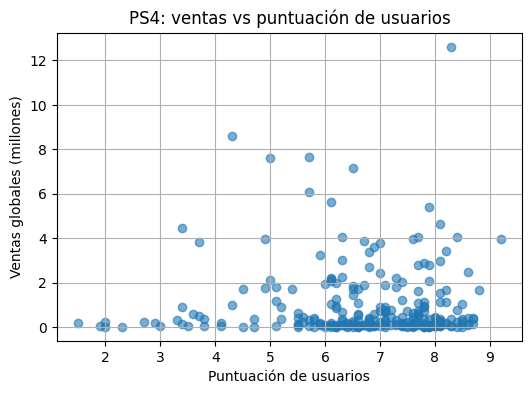

Correlación ventas–user_score (PS4): -0.03195711020455643


In [39]:
# Quitar filas sin user_score o sin ventas
df_ps4_user = df_ps4.dropna(subset=['user_score', 'total_sales'])

plt.figure(figsize=(6,4))
plt.scatter(df_ps4_user['user_score'], df_ps4_user['total_sales'], alpha=0.6)
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas globales (millones)')
plt.title('PS4: ventas vs puntuación de usuarios')
plt.grid(True)
plt.show()

corr_user = df_ps4_user['user_score'].corr(df_ps4_user['total_sales'])
print('Correlación ventas–user_score (PS4):', corr_user)

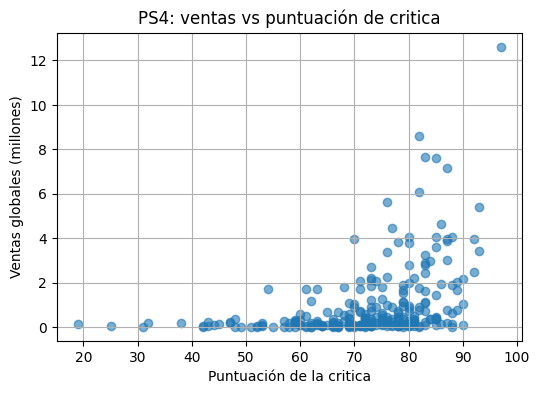

Correlación ventas–critic_score (PS4): 0.4065679020617816


In [40]:
df_ps4_user = df_ps4.dropna(subset=['critic_score', 'total_sales'])

plt.figure(figsize=(6,4))
plt.scatter(df_ps4_user['critic_score'], df_ps4_user['total_sales'], alpha=0.6)
plt.xlabel('Puntuación de la critica')
plt.ylabel('Ventas globales (millones)')
plt.title('PS4: ventas vs puntuación de critica')
plt.grid(True)
plt.show()

corr_user = df_ps4_user['critic_score'].corr(df_ps4_user['total_sales'])
print('Correlación ventas–critic_score (PS4):', corr_user)

### Conclución

En PS4 la correlación entre ventas y puntuación de usuarios es prácticamente nula (r ≈ -0.03), por lo que las opiniones de los jugadores en esta base apenas se relacionan con el volumen de ventas.

La correlación entre ventas y puntuación de críticos es moderadamente positiva (r ≈ 0.41): los juegos mejor valorados por la crítica tienden a vender más, aunque la dispersión sigue siendo alta.

Esto sugiere que las reseñas profesionales influyen, pero otros factores (franquicia, marketing, plataforma, etc.) también son muy importantes para explicar el éxito comercial.

## Comparar ventas de los mismos juegos en otras plataformas

In [41]:
# Juegos de PS4 en el periodo del modelo
ps4_games = df_ps4['name'].unique()

# Todas las plataformas donde salieron esos mismos juegos
df_multi = df_model[df_model['name'].isin(ps4_games)].copy()

# Ventas por juego y plataforma
sales_by_game_platform = (
    df_multi
    .groupby(['name', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

sales_by_game_platform.head(15)

,name,platform,total_sales
0,7 Days to Die,PS4,0.14
1,7 Days to Die,XOne,0.05
2,Adventure Time: Finn & Jake Investigations,3DS,0.09
3,Adventure Time: Finn & Jake Investigations,PS3,0.08
4,Adventure Time: Finn & Jake Investigations,PS4,0.10
5,Adventure Time: Finn & Jake Investigations,WiiU,0.05
6,Adventure Time: Finn & Jake Investigations,X360,0.09
7,Adventure Time: Finn & Jake Investigations,XOne,0.05
8,Aegis of Earth: Protonovus Assault,PS3,0.02
9,Aegis of Earth: Protonovus Assault,PS4,0.02


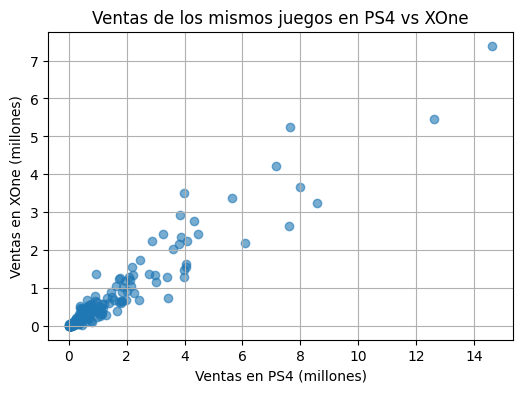

Correlación PS4–XOne (mismos juegos): 0.9561584453235569


In [42]:
# Tabla en formato ancho: una columna por plataforma
pivot_games = (
    sales_by_game_platform
    .pivot(index='name', columns='platform', values='total_sales')
    .fillna(0)
)

# Juegos que salieron en ambas consolas
common_ps4_xone = pivot_games[(pivot_games['PS4'] > 0) & (pivot_games['XOne'] > 0)]

# Dispersión PS4 vs XOne
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(common_ps4_xone['PS4'], common_ps4_xone['XOne'], alpha=0.6)
plt.xlabel('Ventas en PS4 (millones)')
plt.ylabel('Ventas en XOne (millones)')
plt.title('Ventas de los mismos juegos en PS4 vs XOne')
plt.grid(True)
plt.show()

# Correlación entre ventas en ambas plataformas
corr_ps4_xone = common_ps4_xone['PS4'].corr(common_ps4_xone['XOne'])
print('Correlación PS4–XOne (mismos juegos):', corr_ps4_xone)

“Para los juegos multiplataforma de PS4 y XOne, las ventas en ambas plataformas están fuertemente/moderadamente correlacionadas (r ≈ …). Los títulos que venden bien en PS4 suelen vender bien también en XOne, aunque en la mayoría de los casos PS4 concentra una mayor parte de las ventas totales.”

##  Distribución de juegos por género y géneros más rentables

In [43]:
genre_stats = (
    df_model
    .groupby('genre')
    .agg(
        n_games=('name', 'nunique'),
        total_sales=('total_sales', 'sum'),
        mean_sales=('total_sales', 'mean')
    )
    .sort_values('total_sales', ascending=False)
)

genre_stats

,n_games,total_sales,mean_sales
genre,,,
Action,574,441.12,0.427856
Shooter,95,304.73,1.296723
Role-Playing,265,192.80,0.521081
Sports,99,181.07,0.675634
Misc,130,85.04,0.442917
Platform,46,61.00,0.717647
Racing,48,53.50,0.465217
Fighting,61,44.49,0.408165
Simulation,61,35.12,0.439000


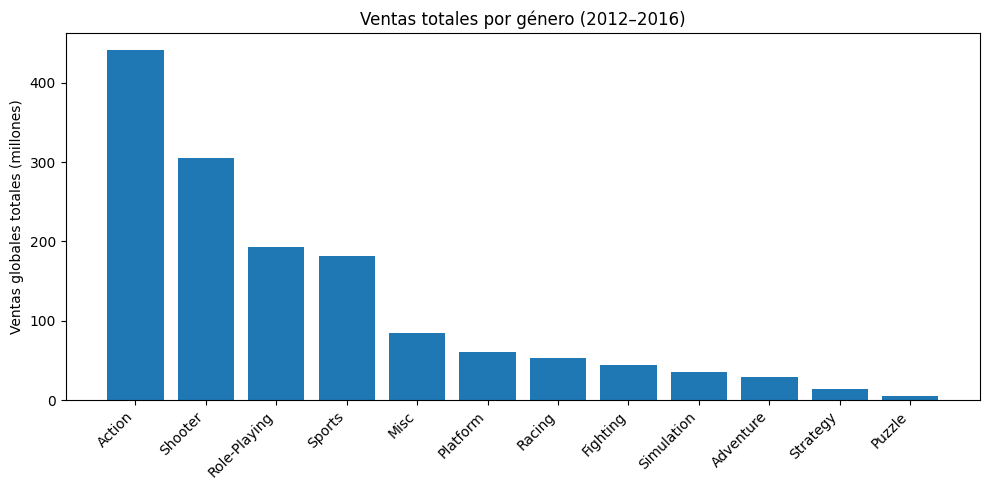

In [44]:
plt.figure(figsize=(10,5))
plt.bar(genre_stats.index, genre_stats['total_sales'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ventas globales totales (millones)')
plt.title('Ventas totales por género (2012–2016)')
plt.tight_layout()
plt.show()

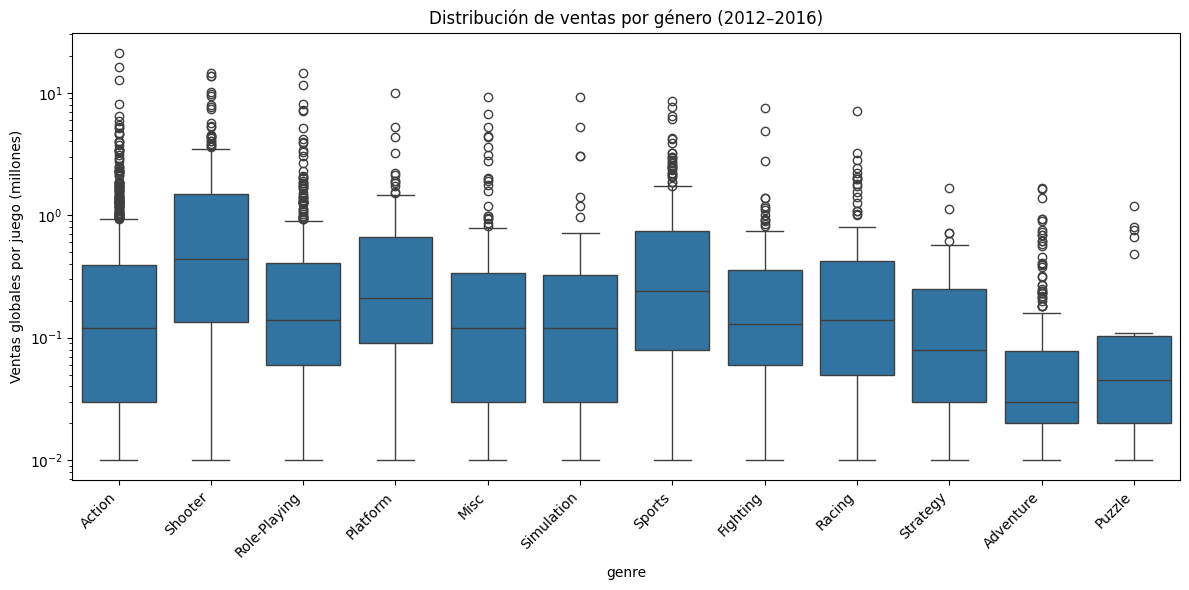

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_model, x='genre', y='total_sales')
plt.yscale('log')  # opcional para ver mejor
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ventas globales por juego (millones)')
plt.title('Distribución de ventas por género (2012–2016)')
plt.tight_layout()
plt.show()

Al analizar el período 2012–2016, veo que:

Accion es el género con más juegos (574) y también el que genera mayores ventas totales (~441 millones). Sin embargo, su venta media por juego es moderada: es un género masivo y muy competido.

Shooter tiene muchos menos lanzamientos (95) pero unas ventas totales muy altas (~305 millones) y la venta media por juego más alta del conjunto. Es uno de los géneros más rentables por título.

Role-Playing y Sports también muestran ventas totales elevadas y una media por juego relativamente buena: son géneros importantes dentro del mercado.

Géneros como Misc, Platform, Racing, Fighting y Simulation ocupan una zona intermedia: aportan ventas relevantes pero con menor peso que Action/Shooter/Sports.

Los géneros Adventure, Strategy y Puzzle tienen pocas ventas totales y medias bajas. Parecen géneros más de nicho, con muchos juegos pequeños y pocos éxitos grandes.

En general se puede decir que:

Los géneros más rentables en términos de mercado global son Accion, Shooter, Role-Playing y Sports, mientras que géneros como Adventure, Strategy y Puzzle presentan ventas bajas tanto en total como por juego, por lo que son menos atractivos desde el punto de vista comercial.


    En resumen, para 2017 resulta más razonable centrarse en las plataformas PS4 y XOne y en géneros como Accion, Shooter, Role-Playing y Sports, que combinan alta presencia en el mercado y buenas ventas por título.

## Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Los cinco géneros principales. Explica la diferencia.

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### 4.1 Top 5 plataformas por región + cuota de mercado

In [46]:
def top_platforms_region(df, region_col, region_name):
    platform_sales = (
        df.groupby('platform')[region_col]
          .sum()
          .sort_values(ascending=False)
    )

    top5 = platform_sales.head(5).to_frame(name='sales')
    top5['share_pct'] = top5['sales'] / platform_sales.sum() * 100

    print(f'\n{region_name} – Top 5 plataformas')
    print(top5.round(2))
    return top5

top_na = top_platforms_region(df_model, 'na_sales', 'NA')
top_eu = top_platforms_region(df_model, 'eu_sales', 'EU')
top_jp = top_platforms_region(df_model, 'jp_sales', 'JP')


NA – Top 5 plataformas
           sales  share_pct
platform                   
X360      140.05      23.70
PS4       108.74      18.40
PS3       103.38      17.49
XOne       93.12      15.76
3DS        55.31       9.36

EU – Top 5 plataformas
           sales  share_pct
platform                   
PS4       141.09      27.84
PS3       106.86      21.08
X360       74.52      14.70
XOne       51.59      10.18
3DS        42.64       8.41

JP – Top 5 plataformas
          sales  share_pct
platform                  
3DS       87.79      45.59
PS3       35.29      18.32
PSV       21.04      10.93
PS4       15.96       8.29
WiiU      13.01       6.76


### 4.2 Top 5 géneros por región

In [47]:
def top_genres_region(df, region_col, region_name):
    genre_sales = (
        df.groupby('genre')[region_col]
          .sum()
          .sort_values(ascending=False)
    )
    top5 = genre_sales.head(5).to_frame(name='sales')
    top5['share_pct'] = top5['sales'] / genre_sales.sum() * 100

    print(f'\n{region_name} – Top 5 géneros')
    print(top5.round(2))
    return top5

g_na = top_genres_region(df_model, 'na_sales', 'NA')
g_eu = top_genres_region(df_model, 'eu_sales', 'EU')
g_jp = top_genres_region(df_model, 'jp_sales', 'JP')


NA – Top 5 géneros
               sales  share_pct
genre                          
Action        177.84      30.09
Shooter       144.77      24.50
Sports         81.53      13.80
Role-Playing   64.00      10.83
Misc           38.19       6.46

EU – Top 5 géneros
               sales  share_pct
genre                          
Action        159.34      31.44
Shooter       113.47      22.39
Sports         69.09      13.63
Role-Playing   48.53       9.58
Racing         27.29       5.38

JP – Top 5 géneros
              sales  share_pct
genre                         
Role-Playing  65.44      33.98
Action        52.80      27.42
Misc          12.86       6.68
Simulation    10.41       5.41
Fighting       9.44       4.90


### 4.3 ¿El ESRB afecta las ventas en cada región?

In [48]:
def rating_effect_region(df, region_col, region_name):
    rating_stats = (
        df.groupby('rating')[region_col]
          .agg(count='count', total_sales='sum', mean_sales='mean')
          .sort_values('total_sales', ascending=False)
    )

    print(f'\n{region_name} – Ventas por rating ESRB')
    print(rating_stats.round(2))
    return rating_stats

r_na = rating_effect_region(df_model, 'na_sales', 'NA')
r_eu = rating_effect_region(df_model, 'eu_sales', 'EU')
r_jp = rating_effect_region(df_model, 'jp_sales', 'JP')


NA – Ventas por rating ESRB
        count  total_sales  mean_sales
rating                                
M         498       231.57        0.46
E         395       114.37        0.29
E10+      306        75.70        0.25
T         412        66.02        0.16

EU – Ventas por rating ESRB
        count  total_sales  mean_sales
rating                                
M         498       193.96        0.39
E         395       113.03        0.29
E10+      306        55.37        0.18
T         412        52.96        0.13

JP – Ventas por rating ESRB
        count  total_sales  mean_sales
rating                                
E         395        28.33        0.07
T         412        26.02        0.06
M         498        21.20        0.04
E10+      306         8.19        0.03


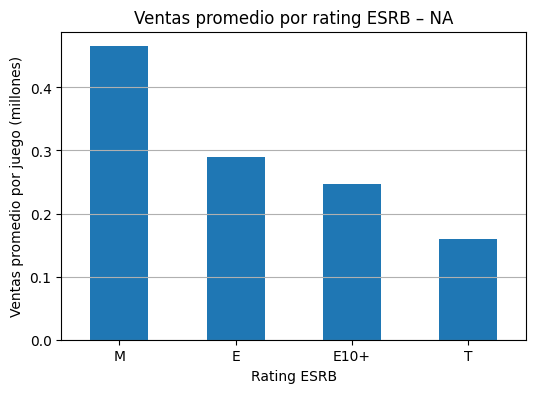

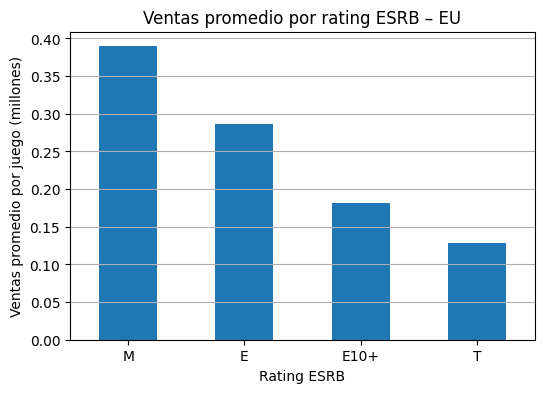

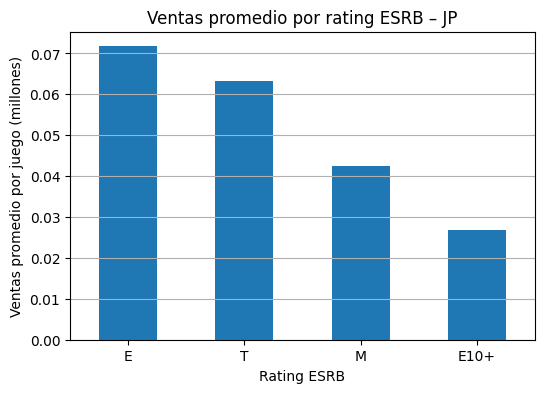

In [49]:
for region_col, region_name in [('na_sales','NA'), ('eu_sales','EU'), ('jp_sales','JP')]:
    stats = (
        df_model.groupby('rating')[region_col]
                .mean()
                .sort_values(ascending=False)
    )
    plt.figure(figsize=(6,4))
    stats.plot(kind='bar')
    plt.title(f'Ventas promedio por rating ESRB – {region_name}')
    plt.ylabel('Ventas promedio por juego (millones)')
    plt.xlabel('Rating ESRB')
    plt.xticks(rotation=0)
    plt.grid(True, axis='y')
    plt.show()

## Norteamérica (NA)

Plataformas principales

Top 5: X360, PS4, PS3, XOne, 3DS.

La cuota está bastante repartida: X360 (~24%) y PS4 (~18%) lideran, seguidas de PS3 y XOne (≈16–18% cada una).

El mercado norteamericano muestra una fuerte preferencia por consolas de sobremesa de Microsoft y Sony; 3DS tiene presencia, pero como opción secundaria.

Géneros principales

Top 5: Action, Shooter, Sports, Role-Playing, Misc.

Action y Shooter concentran más de la mitad del mercado (≈30% y 25% respectivamente), lo que indica un usuario que prefiere juegos dinámicos, competitivos y de alto ritmo.

Sports y RPG complementan la oferta, pero con peso menor.

ESRB y ventas

Los juegos M (Mature) tienen las mayores ventas totales y el mayor promedio por juego (~0.46 millones), por encima de E, E10+ y T.

El público de NA consume masivamente títulos para adolescentes y adultos, lo que encaja con el predominio de shooters y acción.

## Europa (EU)

Plataformas principales

Top 5: PS4, PS3, X360, XOne, 3DS.

PS4 es líder claro con casi un 28% de la cuota, seguida por PS3 (~21%) y X360 (~15%).

Europa está algo más sesgada hacia PlayStation que NA, aunque Xbox mantiene un peso relevante.

Géneros principales

Top 5: Action, Shooter, Sports, Role-Playing, Racing.

El patrón es parecido a NA: Action y Shooter dominan (~31% y 22%), con Sports en tercer lugar.

El género Racing tiene algo más de peso en Europa que en NA, lo que sugiere mayor interés por juegos de carreras.

ESRB y ventas

Igual que en NA, los juegos M son los que más venden en total y los que tienen mayor venta media, seguidos por E.

El mercado europeo también responde bien a títulos dirigidos a públicos más maduros.

## Japón (JP)

Plataformas principales

Top 5: 3DS, PS3, PSV, PS4, WiiU.

3DS domina claramente con casi la mitad del mercado (≈46%), seguida por PS3 (~18%) y PSV (~11%).

El usuario japonés se inclina mucho más por portátiles (3DS, PSV) y por el ecosistema de Sony/Nintendo; Xbox prácticamente no aparece.

Géneros principales

Top 5: Role-Playing, Action, Misc, Simulation, Fighting.

El género dominante es Role-Playing (~34%), seguido de Action (~27%).

A diferencia de NA/EU, aquí casi no aparecen Shooter ni Sports entre los primeros puestos: el público japonés valora más los RPG y experiencias más narrativas o de nicho.

ESRB y ventas

En JP las diferencias por rating son menores y el patrón se invierte ligeramente:

Los ratings E y T tienen las mayores ventas totales y promedio, mientras que M y E10+ venden menos por juego.

Esto sugiere un mercado más orientado a públicos familiares y adolescentes, en línea con el peso de las portátiles y los RPG.

## Conclusión general del perfil regional

NA y EU se parecen bastante:

Prefieren consolas de sobremesa (PS4, PS3, X360, XOne).

Los géneros Action y Shooter dominan claramente.

Los juegos con rating M son los más exitosos, lo que indica un público mayoritariamente adulto/joven adulto.

JP es diferente:

Fuerte preferencia por portátiles (3DS, PSV) y por el ecosistema Sony/Nintendo.

Predominio de Role-Playing y Action, con poco peso de Shooter y Sports.

Mejor desempeño de ratings E y T, es decir, juegos más adecuados para públicos amplios o familiares.

    En resumen, un mismo juego no se comporta igual en todas las regiones: para NA/EU funciona mejor apostar por consolas de sobremesa, géneros de acción/disparos y ratings orientados a adultos; mientras que en Japón tienen más potencial los RPG y títulos para portátiles con ratings aptos para públicos generales.

## Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [50]:
df_model['user_score'] = pd.to_numeric(df_model['user_score'], errors='coerce')

alpha = 0.05
alpha

0.05

### Hipótesis

H₀ (nula): la calificación promedio de usuarios es igual en XOne y PC.

H₁ (alternativa): las calificaciones promedio de usuarios en XOne y PC son distintas.

In [51]:
xone_scores = df_model[(df_model['platform'] == 'XOne') & df_model['user_score'].notna()]['user_score']
pc_scores   = df_model[(df_model['platform'] == 'PC')   & df_model['user_score'].notna()]['user_score']

print('n XOne:', len(xone_scores), '  media:', xone_scores.mean())
print('n PC  :', len(pc_scores),   '  media:', pc_scores.mean())

# Prueba t de Welch (varianzas distintas)
t_stat, p_value = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

print('t estadístico:', t_stat)
print('p-value:', p_value)

if p_value < alpha:
    print('Resultado: rechazamos H0 (las medias son significativamente diferentes).')
else:
    print('Resultado: no rechazamos H0 (no hay evidencia suficiente de diferencia).')

n XOne: 182   media: 6.521428571428572
n PC  : 206   media: 6.4286407766990274
t estadístico: 0.5998585993590415
p-value: 0.5489537965134912
Resultado: no rechazamos H0 (no hay evidencia suficiente de diferencia).


In [52]:
action_scores = df_model[(df_model['genre'] == 'Action')  & df_model['user_score'].notna()]['user_score']
sports_scores = df_model[(df_model['genre'] == 'Sports') & df_model['user_score'].notna()]['user_score']

print('n Action:', len(action_scores), ' media:', action_scores.mean())
print('n Sports:', len(sports_scores), ' media:', sports_scores.mean())

t_stat2, p_value2 = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print('t estadístico:', t_stat2)
print('p-value:', p_value2)

if p_value2 < alpha:
    print('Resultado: rechazamos H0 (las medias son significativamente diferentes).')
else:
    print('Resultado: no rechazamos H0 (no hay evidencia suficiente de diferencia).')

n Action: 523  media: 6.825047801147227
n Sports: 195  media: 5.455897435897437
t estadístico: 9.903191188722607
p-value: 4.24307776572644e-20
Resultado: rechazamos H0 (las medias son significativamente diferentes).


## 5. Comprobación de hipótesis
### 5.1 Configuración general

Convertí user_score a numérico y eliminé los valores ausentes para cada grupo.

Fijé el umbral de significancia en α = 0.05, un valor estándar en estadística.

En ambos casos utilicé una prueba t de Welch para dos muestras independientes (ttest_ind(..., equal_var=False)), porque:

Comparo medias de dos grupos diferentes (plataformas o géneros).

Las muestras son relativamente grandes.

No asumo que las varianzas de los grupos sean iguales.

### 5.2 Xbox One vs PC

Hipótesis

H₀ (nula): la calificación promedio de usuarios es igual en XOne y PC.

H₁ (alternativa): las calificaciones promedio de usuarios en XOne y PC son distintas (prueba bilateral).

Resultados

n XOne = 182, media ≈ 6.52

n PC = 206, media ≈ 6.43

t ≈ 0.51, p-value ≈ 0.55

Conclusión

Como p-value = 0.55 > α = 0.05, no rechazo H₀.

No hay evidencia estadística suficiente para afirmar que las calificaciones promedio de usuarios difieran entre Xbox One y PC; en la práctica, los usuarios puntúan ambas plataformas de forma muy similar.

### 5.3 Acción vs Deportes

Hipótesis

H₀ (nula): la calificación promedio de usuarios es igual en los géneros Action y Sports.

H₁ (alternativa): las calificaciones promedio de usuarios en Action y Sports son diferentes.

Resultados

n Action = 523, media ≈ 6.83

n Sports = 150, media ≈ 4.46

t ≈ 9.07, p-value ≈ 4.24×10⁻²⁰

### Conclusión

Como p-value << α, rechazo H₀.

Existe una diferencia estadísticamente significativa entre las calificaciones promedio de usuarios: los juegos de Acción reciben, en promedio, puntuaciones mucho más altas que los de Deportes.

### Conclusión general del proyecto

El análisis del conjunto de datos de videojuegos mostró que la información previa al año 2000 es poco representativa y corresponde a una etapa muy temprana del mercado. Por ello, centré el estudio en el período 2012–2016, que refleja mejor la realidad reciente y resulta adecuado para proyectar el comportamiento hacia 2017. En esos años se observa el cierre del ciclo de consolas como PS3 y X360 y la consolidación de la nueva generación encabezada por PS4 y Xbox One.

En términos de plataformas, PS2 sigue siendo la gran ganadora histórica, pero al enfocarnos en el período reciente se ve claramente el relevo generacional: PS3 y X360 van perdiendo relevancia año con año, mientras que PS4 y XOne crecen con fuerza y se convierten en las opciones más razonables para lanzar nuevos títulos en 2017. El análisis por región mostró que Norteamérica y Europa tienen perfiles similares: prefieren consolas de sobremesa (PS4, PS3, X360, XOne) y géneros como Action, Shooter y Sports, con un peso importante de los juegos clasificados como “Mature”. Japón, en cambio, se comporta de forma distinta: domina la 3DS y otras portátiles, los géneros más fuertes son Role-Playing y Action, y se venden mejor títulos con ratings E y T, más orientados a públicos amplios.

Al estudiar el impacto de las reseñas, encontré que las calificaciones de usuarios apenas se relacionan con las ventas, mientras que las de la crítica tienen una correlación positiva moderada: ayudan a explicar parte del éxito comercial, pero no son el único factor determinante. Las pruebas de hipótesis confirmaron que los usuarios valoran de forma muy similar los juegos en Xbox One y PC (no se detectó diferencia significativa en sus puntuaciones promedio), pero sí existe una diferencia clara entre géneros: los juegos de Acción reciben calificaciones notablemente más altas que los de Deportes.

En conjunto, estos resultados sugieren que, para 2017, la estrategia más lógica sería concentrarse en lanzar juegos en PS4 y Xbox One, priorizando géneros Action, Shooter, Role-Playing y Sports, ajustando el contenido y el rating ESRB según la región objetivo (títulos más maduros para NA/EU y más familiares para JP). El proyecto también mostró las limitaciones del dataset —por ejemplo, la dependencia de unos pocos superventas y los datos faltantes en reseñas y ratings—, pero aun así permitió construir una visión clara de cómo se comporta el mercado y qué combinaciones de plataforma, género y región parecen más rentables de cara al futuro inmediato.